# Covid-19 Analysis 


### Importing the libraries 

In [65]:
import pandas as pd
import numpy as np 
import seaborn as sns
from matplotlib import pyplot as plt
import datetime as dt

#Linear regression
from sklearn.model_selection import train_test_split

# to ignore warnings
import warnings
warnings.filterwarnings("ignore")

### Importing and Visualizing the dataset 

In [3]:
# Data on COVID-19 (coronavirus) by Our World in Data
covid = pd.read_csv('covid.csv')  

In [4]:
#Having a glance at some of the records
covid.head()

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,...,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_100k
0,ABW,Aruba,2020-03-13,2,2,0,0,18.733,18.733,0.0,...,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN
1,ABW,Aruba,2020-03-20,4,2,0,0,37.465,18.733,0.0,...,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN
2,ABW,Aruba,2020-03-24,12,8,0,0,112.395,74.930,0.0,...,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN
3,ABW,Aruba,2020-03-25,17,5,0,0,159.227,46.831,0.0,...,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN
4,ABW,Aruba,2020-03-26,19,2,0,0,177.959,18.733,0.0,...,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN


In [5]:
#Looking at the shape
covid.shape

(19496, 32)

In [6]:
covid.columns

Index(['iso_code', 'location', 'date', 'total_cases', 'new_cases',
       'total_deaths', 'new_deaths', 'total_cases_per_million',
       'new_cases_per_million', 'total_deaths_per_million',
       'new_deaths_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'tests_units',
       'stringency_index', 'population', 'population_density', 'median_age',
       'aged_65_older', 'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cvd_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_100k'],
      dtype='object')

In [7]:
#Looking at the different locations
covid["location"].value_counts()

Belarus           146
Iceland           146
Israel            146
Belgium           146
Mexico            146
                 ... 
Yemen              45
Western Sahara     29
Tajikistan         24
Comoros            23
Lesotho            10
Name: location, Length: 212, dtype: int64

In [8]:
#Checking if columns have null values
covid.isna().any()

iso_code                            True
location                           False
date                               False
total_cases                        False
new_cases                          False
total_deaths                       False
new_deaths                         False
total_cases_per_million             True
new_cases_per_million               True
total_deaths_per_million            True
new_deaths_per_million              True
total_tests                         True
new_tests                           True
total_tests_per_thousand            True
new_tests_per_thousand              True
new_tests_smoothed                  True
new_tests_smoothed_per_thousand     True
tests_units                         True
stringency_index                    True
population                          True
population_density                  True
median_age                          True
aged_65_older                       True
aged_70_older                       True
gdp_per_capita  

In [9]:
#Getting the sum of null values across each column
covid.isna().sum()

iso_code                              64
location                               0
date                                   0
total_cases                            0
new_cases                              0
total_deaths                           0
new_deaths                             0
total_cases_per_million              377
new_cases_per_million                377
total_deaths_per_million             377
new_deaths_per_million               377
total_tests                        14332
new_tests                          14904
total_tests_per_thousand           14332
new_tests_per_thousand             14904
new_tests_smoothed                 13866
new_tests_smoothed_per_thousand    13866
tests_units                        13267
stringency_index                    4500
population                            64
population_density                   850
median_age                          1743
aged_65_older                       1980
aged_70_older                       1832
gdp_per_capita  

### India's Cases

In [10]:
#Getting the cases in India
india_case=covid[covid["location"]=="India"] 

In [11]:
india_case.head()

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,...,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_100k
8379,IND,India,2019-12-31,0,0,0,0,0.0,0.0,0.0,...,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53
8380,IND,India,2020-01-01,0,0,0,0,0.0,0.0,0.0,...,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53
8381,IND,India,2020-01-02,0,0,0,0,0.0,0.0,0.0,...,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53
8382,IND,India,2020-01-03,0,0,0,0,0.0,0.0,0.0,...,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53
8383,IND,India,2020-01-04,0,0,0,0,0.0,0.0,0.0,...,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53


In [12]:
india_case.tail()

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,...,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_100k
8519,IND,India,2020-05-20,106750,5611,3303,140,77.355,4.066,2.393,...,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53
8520,IND,India,2020-05-21,112359,5609,3435,132,81.419,4.064,2.489,...,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53
8521,IND,India,2020-05-22,118447,6088,3583,148,85.831,4.412,2.596,...,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53
8522,IND,India,2020-05-23,125101,6654,3720,137,90.653,4.822,2.696,...,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53
8523,IND,India,2020-05-24,131868,6767,3867,147,95.556,4.904,2.802,...,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53


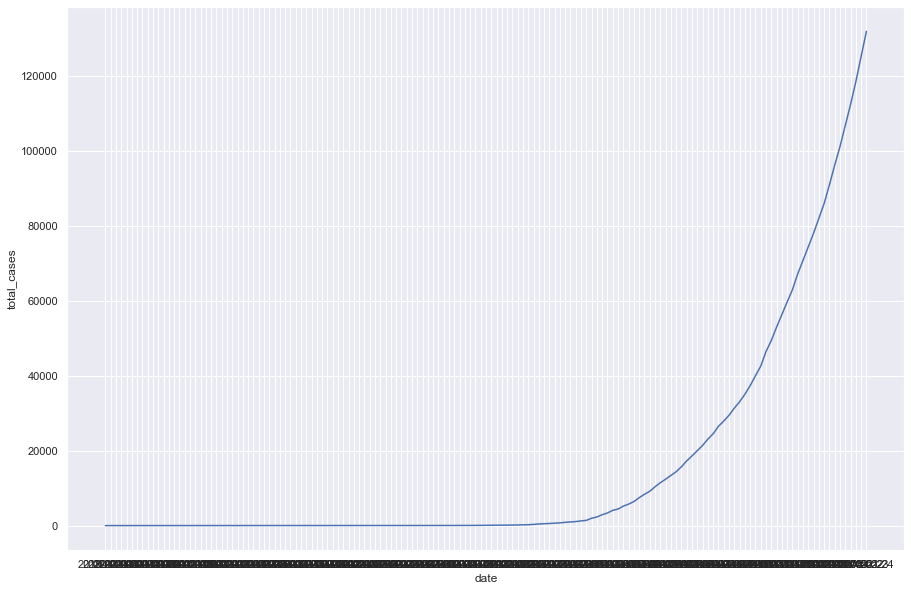

In [18]:
#Total cases per day
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(x="date",y="total_cases",data=india_case)
plt.show()

we can see that from the graph that there is an exponential increase in the total number of cases after a cerain time so now we will observe the spike in the cases for last 5 to 8 days from the dataset 

In [23]:
#Making a dataframe for last 8 days
india_last_8_days=india_case.tail(8)

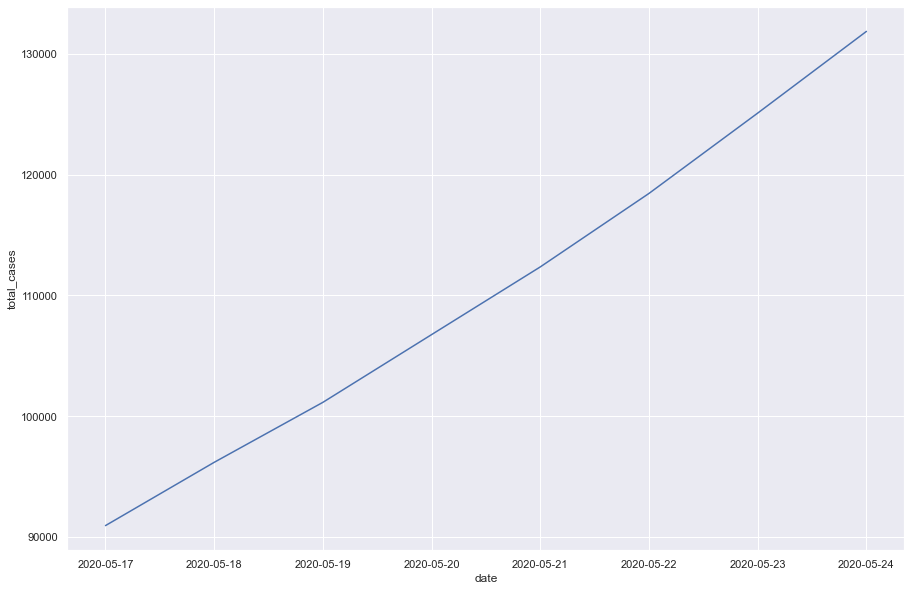

In [24]:
#Total cases in last 5 days
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(x="date",y="total_cases",data=india_last_8_days)
plt.show()

###  Number of test conducted visualization

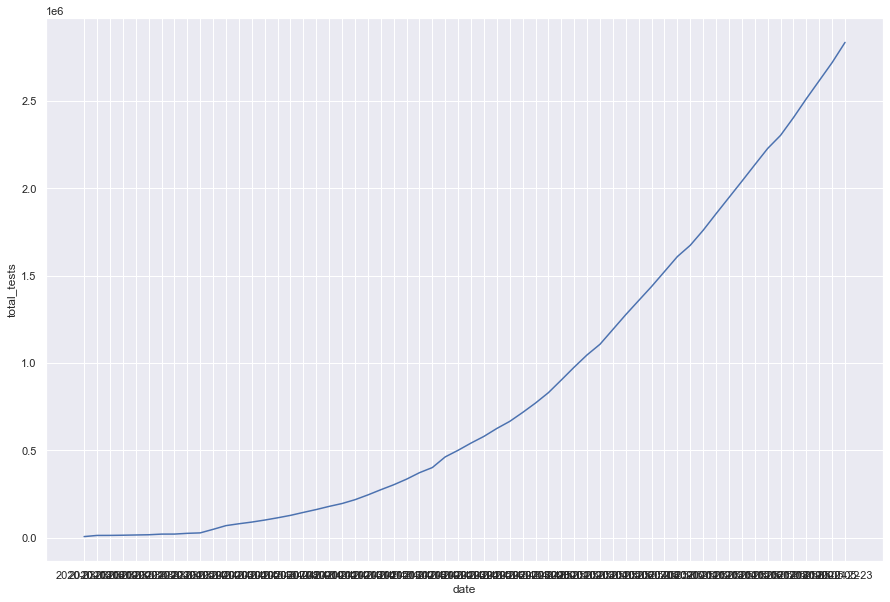

In [25]:
#Total tests per day
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(x="date",y="total_tests",data=india_case)
plt.show()

we can see a clear exponential increase in the total number of tests after a cerain time so now we will observe the spike in the cases for last 5 to 8 days from the dataset 

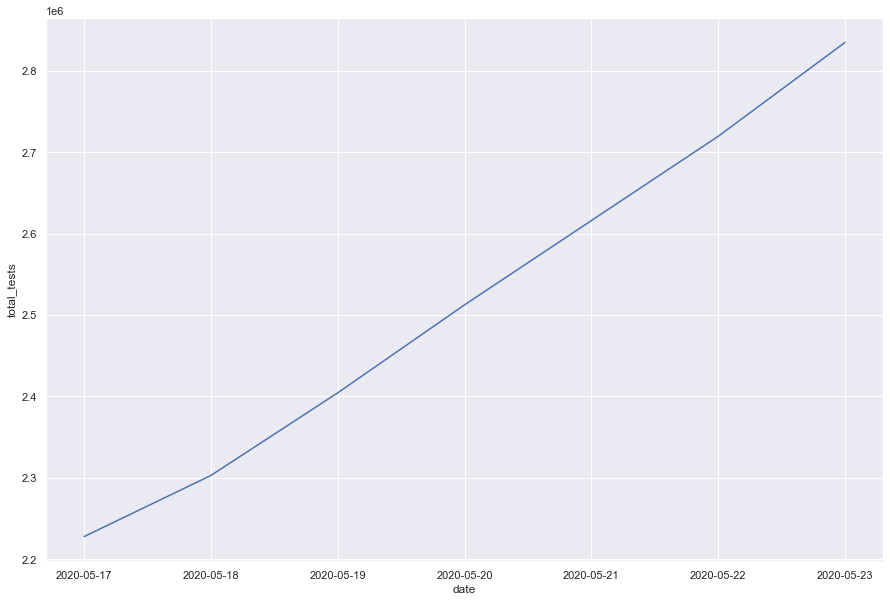

In [26]:
#Total tests in last 8 days
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(x="date",y="total_tests",data=india_last_8_days)
plt.show()

# Brazil Cases

In [27]:
#Brazil Case
brazil_case=covid[covid["location"]=="Brazil"] 
brazil_case.head()

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,...,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_100k
2510,BRA,Brazil,2019-12-31,0,0,0,0,0.0,0.0,0.0,...,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2
2511,BRA,Brazil,2020-01-01,0,0,0,0,0.0,0.0,0.0,...,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2
2512,BRA,Brazil,2020-01-02,0,0,0,0,0.0,0.0,0.0,...,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2
2513,BRA,Brazil,2020-01-03,0,0,0,0,0.0,0.0,0.0,...,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2
2514,BRA,Brazil,2020-01-04,0,0,0,0,0.0,0.0,0.0,...,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2


In [28]:
brazil_case.tail()

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,...,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_100k
2651,BRA,Brazil,2020-05-20,271628,17408,17971,1179,1277.892,81.897,84.546,...,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2
2652,BRA,Brazil,2020-05-21,291579,19951,18859,888,1371.753,93.861,88.723,...,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2
2653,BRA,Brazil,2020-05-22,310087,18508,20047,1188,1458.825,87.072,94.312,...,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2
2654,BRA,Brazil,2020-05-23,330890,20803,21048,1001,1556.694,97.869,99.022,...,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2
2655,BRA,Brazil,2020-05-24,347398,16508,22013,965,1634.357,77.663,103.562,...,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2


In [31]:
#Making a dataframe for brazil for last 7 days
brazil_last_7_days=brazil_case.tail(7)

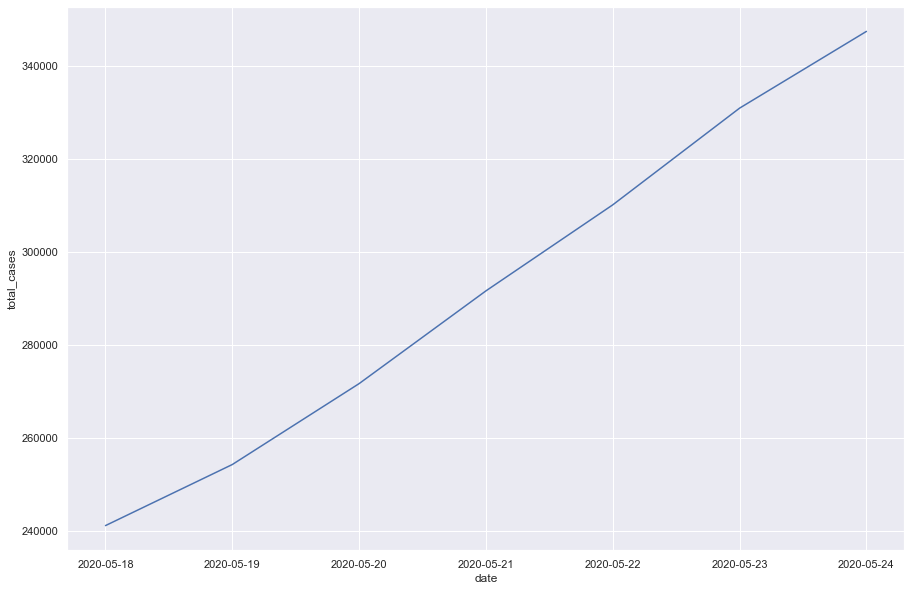

In [32]:
#Total cases in last 5 days
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(x="date",y="total_cases",data=brazil_last_7_days)
plt.show()

# Country wise analysis 

In [33]:
#Understanding cases of India, China and Japan
india_japan_china=covid[(covid["location"] =="India") | (covid["location"] =="China") | (covid["location"]=="Japan")]

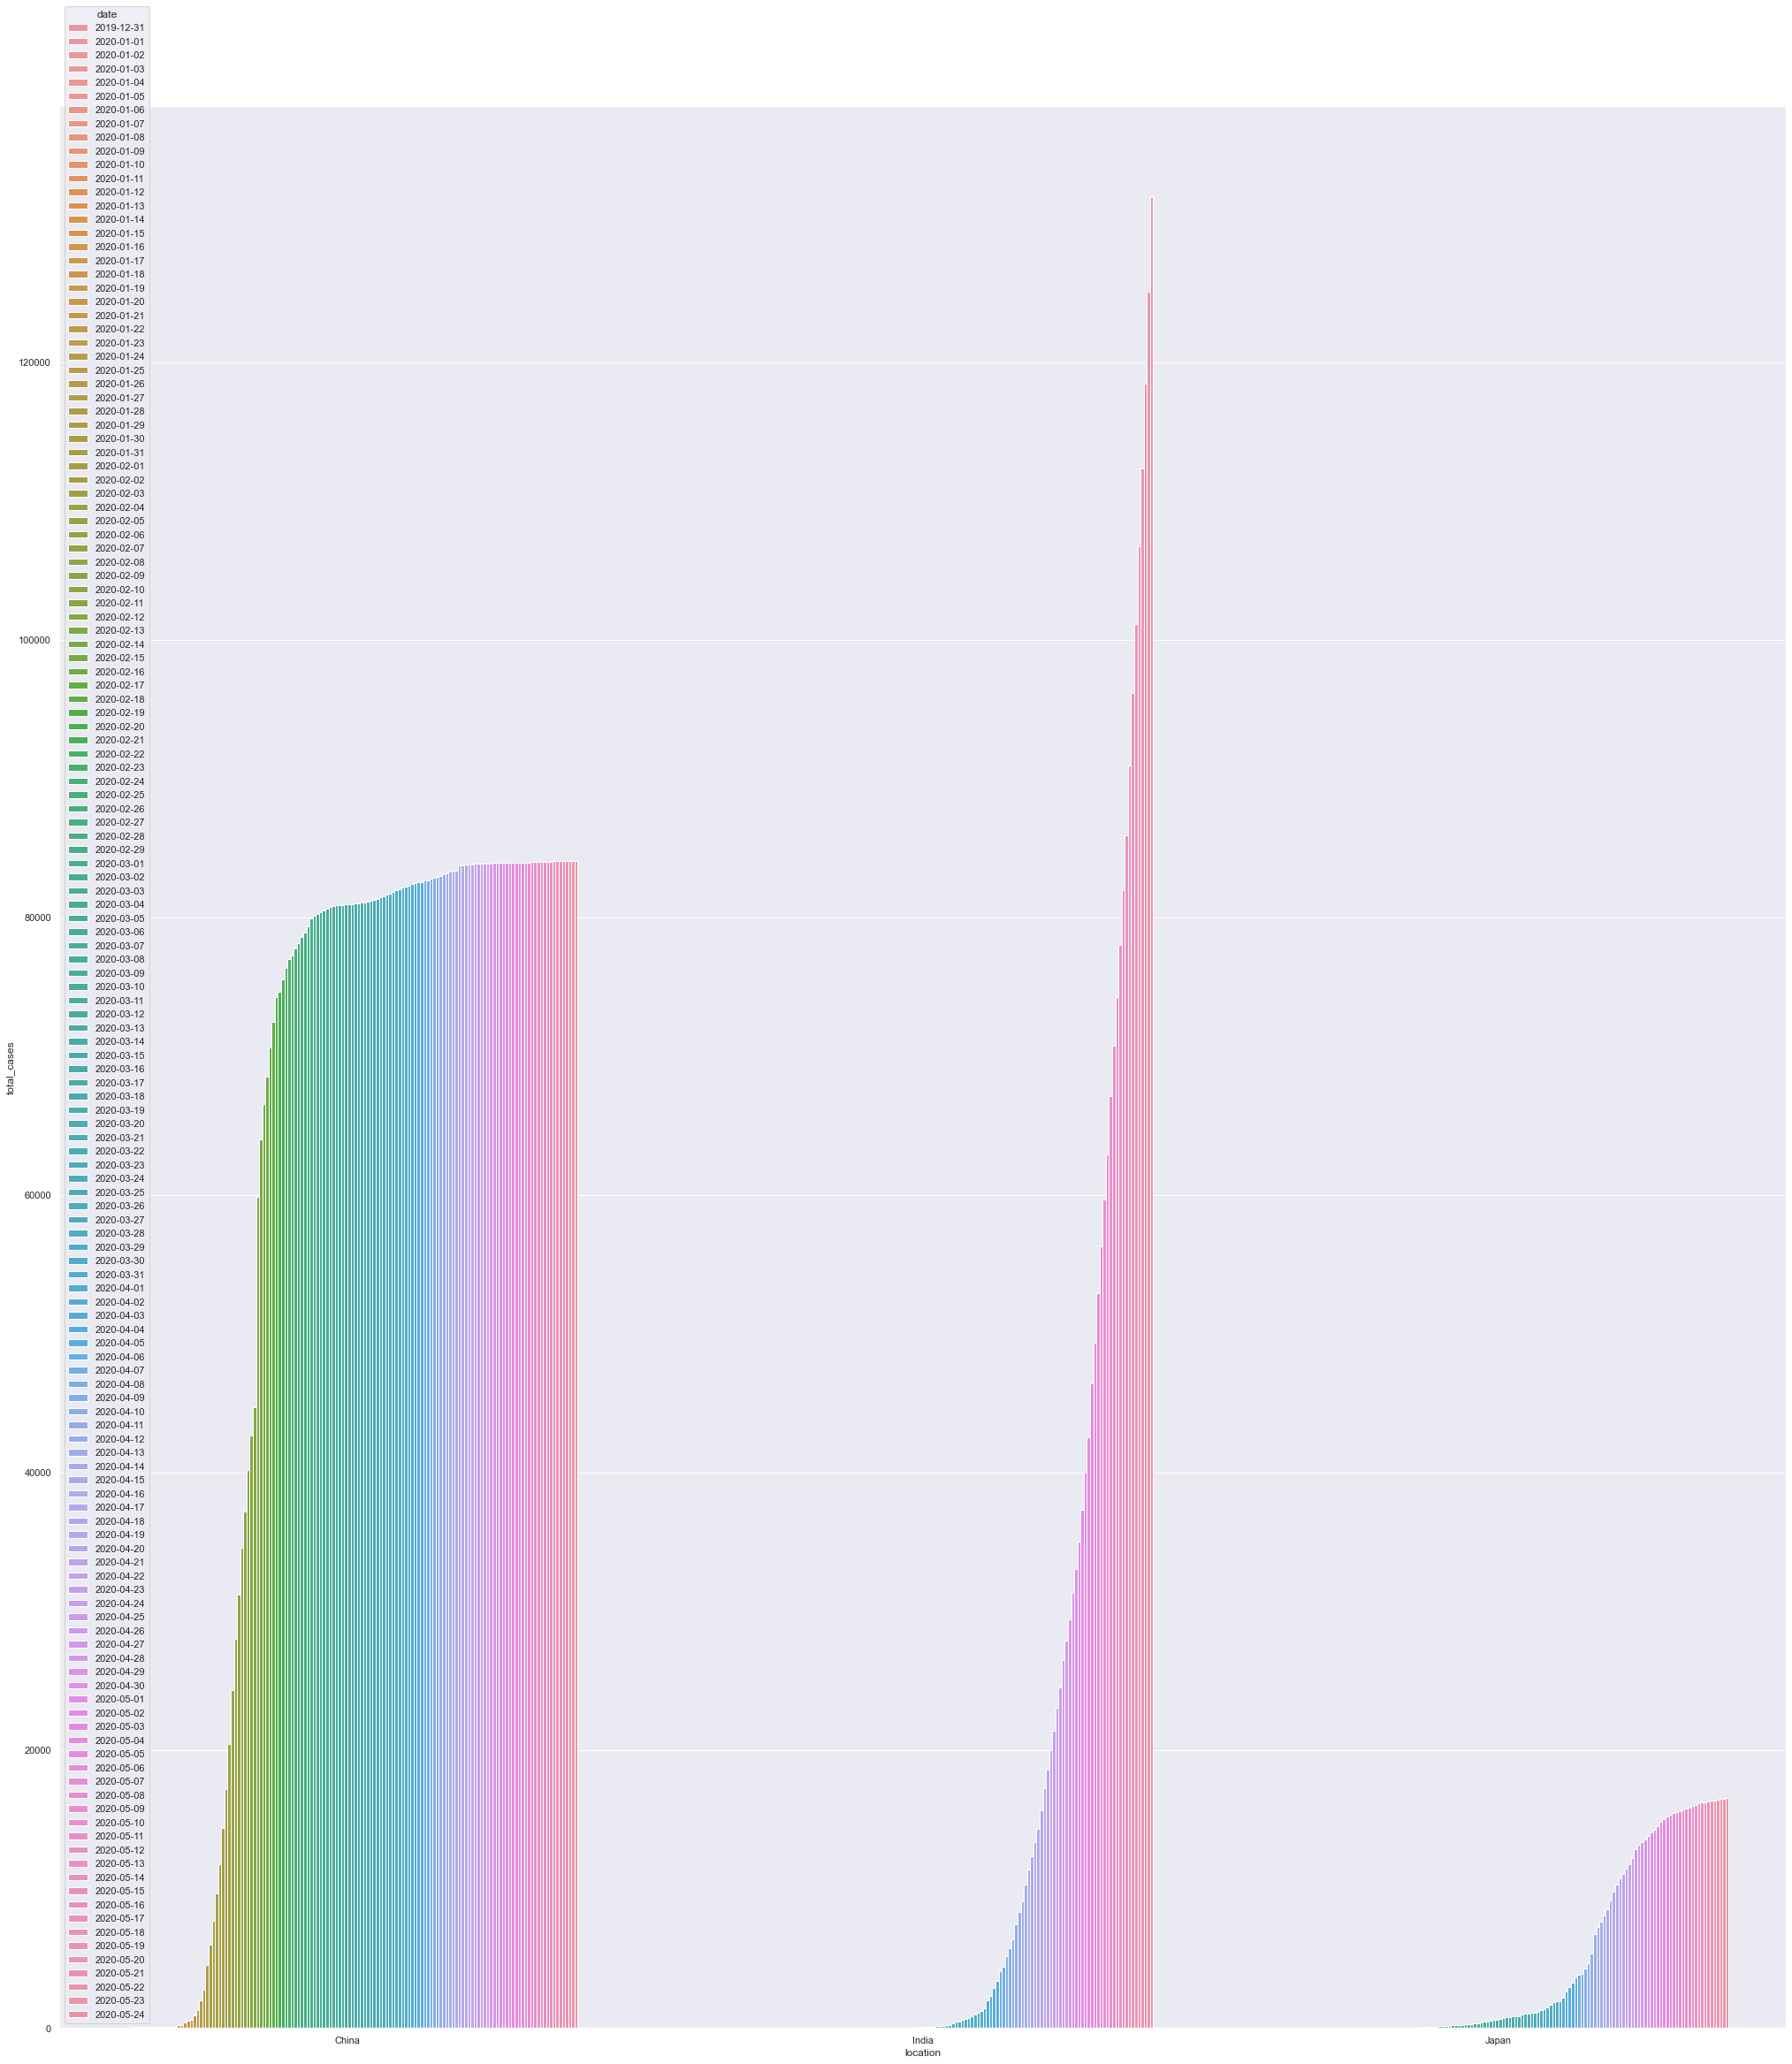

In [37]:
#Plotting growth of cases across China, India and Japan
sns.set(rc={'figure.figsize':(35,40)})
sns.barplot(x="location",y="total_cases",data=india_japan_china,hue="date")
plt.show()

In [38]:
#Understanding cases of germany and spain
germany_spain=covid[(covid["location"] =="Germany") | (covid["location"] =="Spain")]

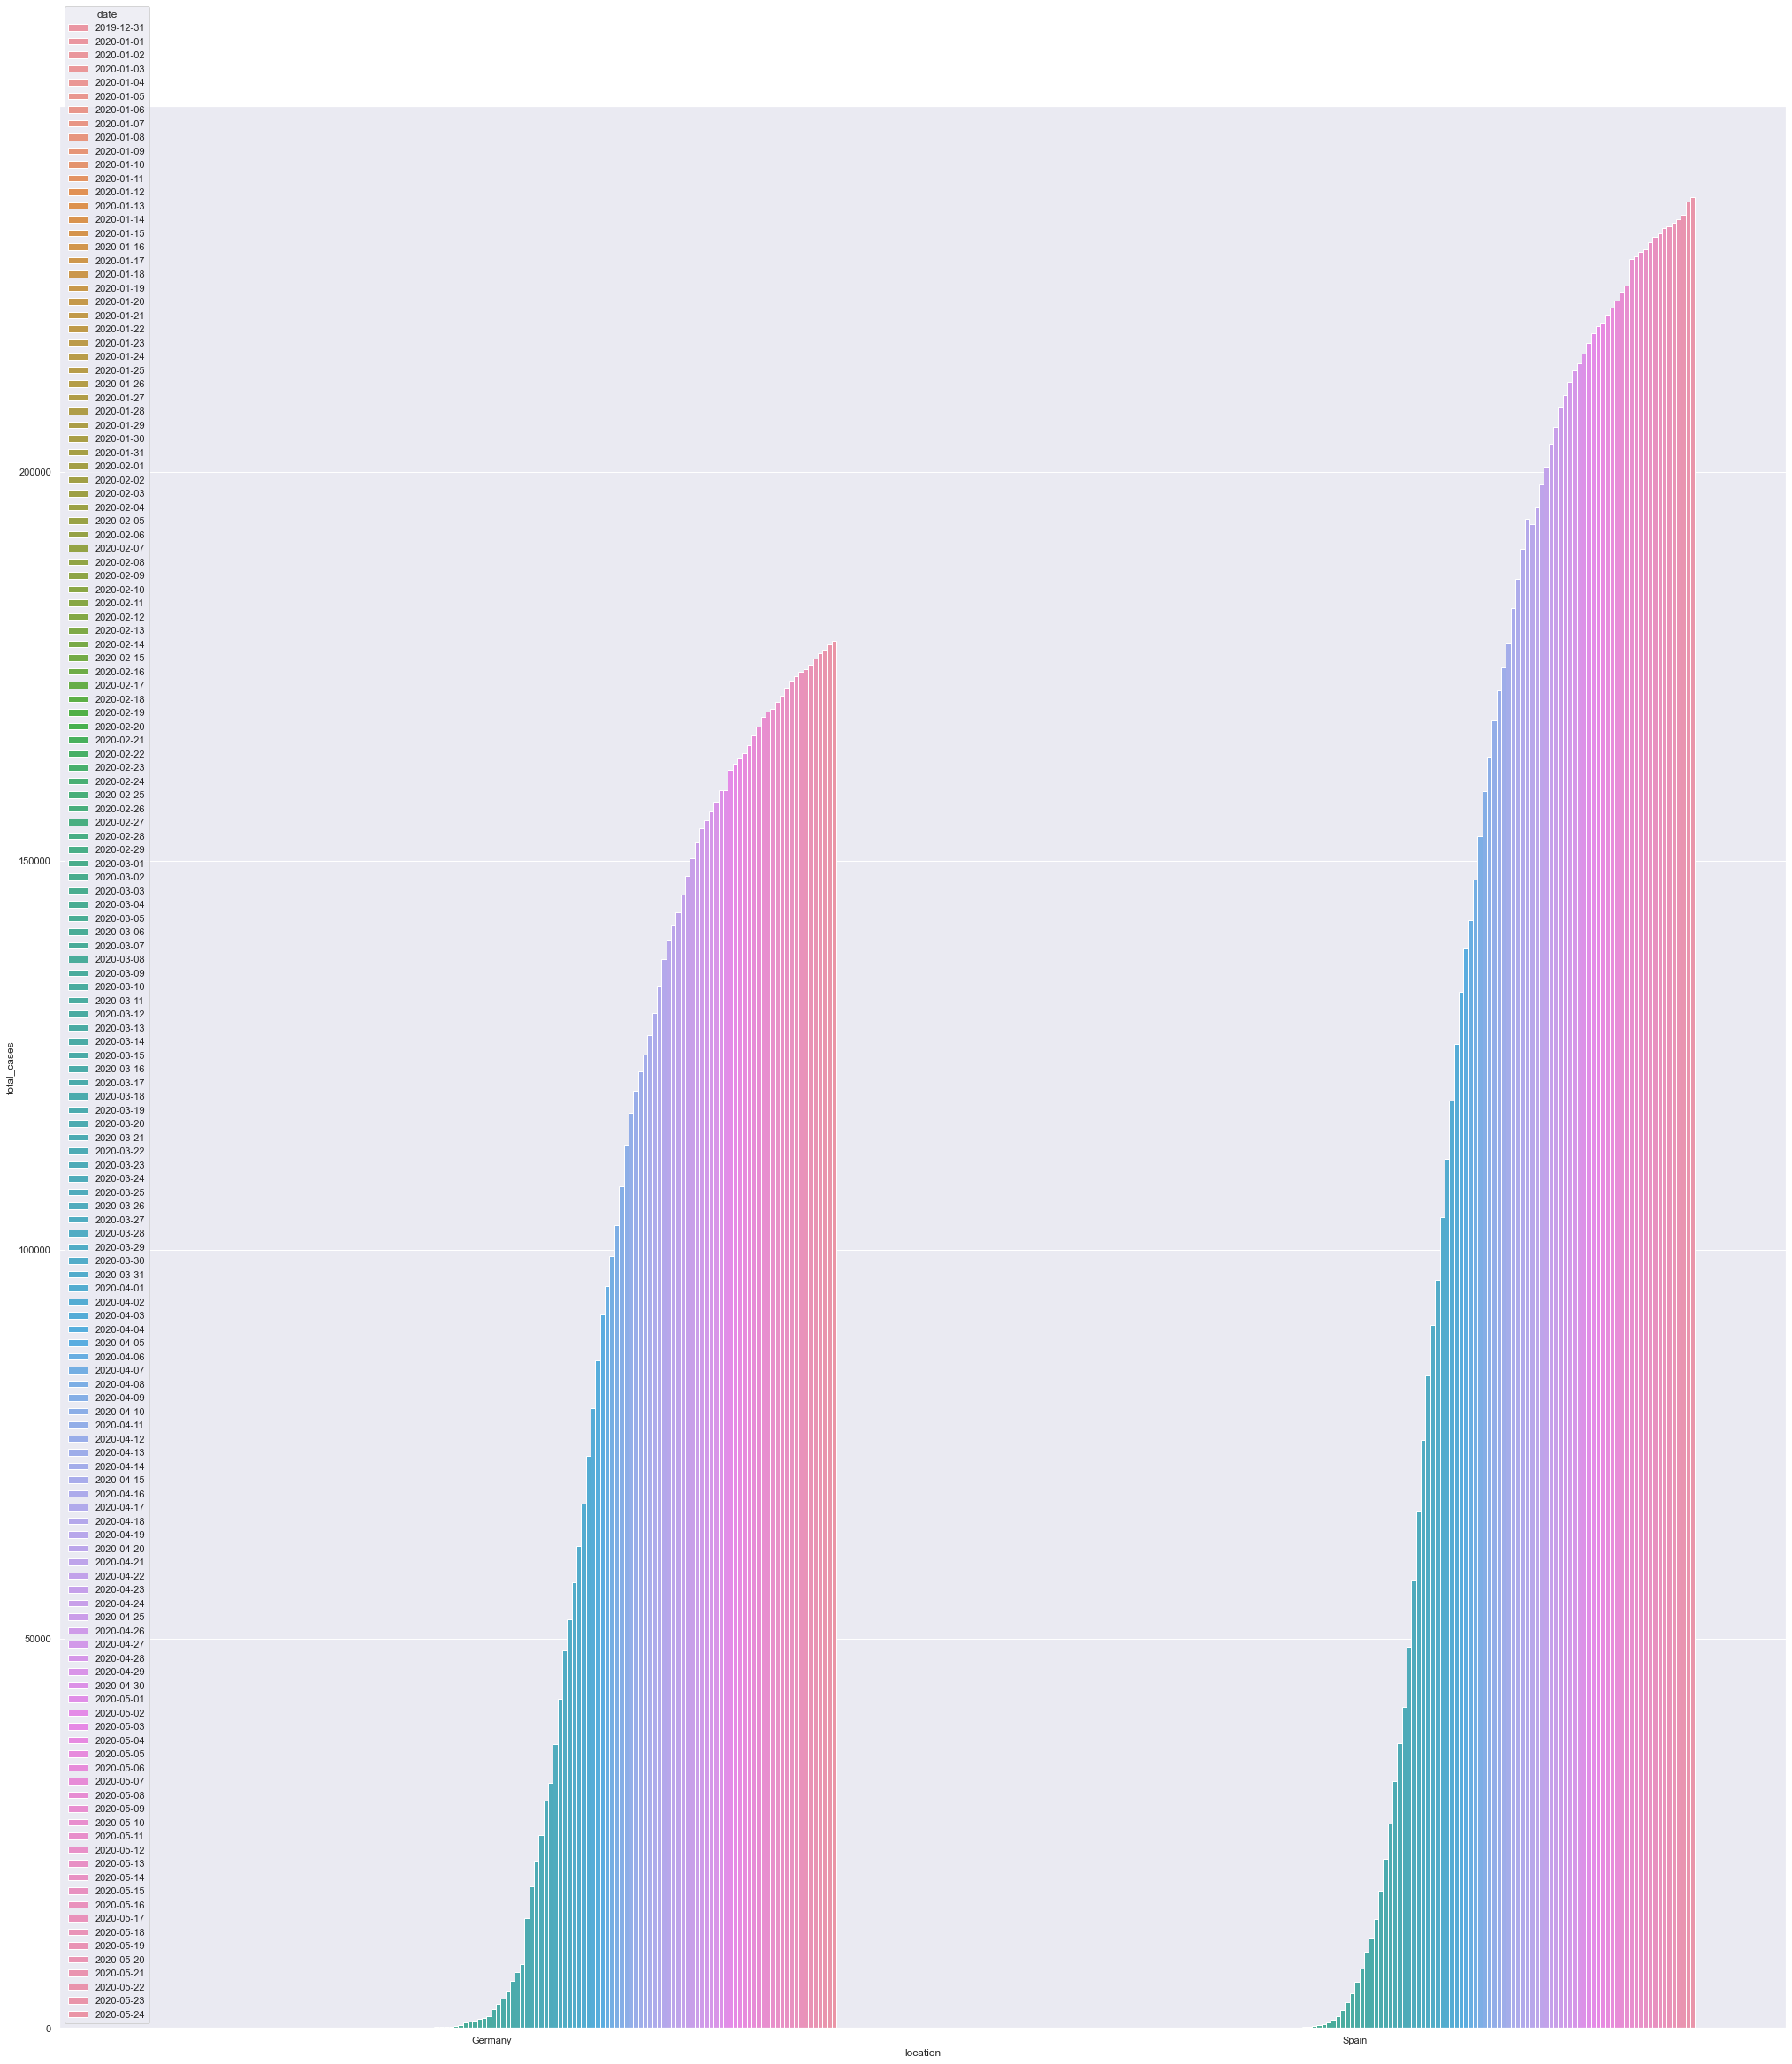

In [51]:
#Plotting growth of cases across Germany and Spain
sns.set(rc={'figure.figsize':(35,40)})
sns.set()

sns.barplot(x="location",y="total_cases",data=germany_spain,hue="date")
 

plt.show()

## Getting latest data available in dataset 

In [55]:
last_day_cases=covid[covid["date"]=="2020-05-24"]
last_day_cases

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,...,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_100k
62,ABW,Aruba,2020-05-24,101,0,3,0,945.994,0.000,28.099,...,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN
198,AFG,Afghanistan,2020-05-24,9998,782,216,11,256.831,20.088,5.549,...,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.500
262,AGO,Angola,2020-05-24,60,0,3,0,1.826,0.000,0.091,...,2.405,1.362,5819.495,NaN,276.045,3.94,NaN,NaN,26.664,NaN
321,AIA,Anguilla,2020-05-24,3,0,0,0,199.973,0.000,0.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
398,ALB,Albania,2020-05-24,989,8,31,0,343.665,2.780,10.772,...,13.188,8.643,11803.431,1.1,304.195,10.08,7.100,51.200,NaN,2.890
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19045,YEM,Yemen,2020-05-24,212,7,39,6,7.108,0.235,1.308,...,2.922,1.583,1479.147,18.8,495.003,5.35,7.600,29.200,49.542,0.700
19153,ZAF,South Africa,2020-05-24,21343,1218,407,10,359.863,20.537,6.862,...,5.344,3.053,12294.876,18.9,200.380,5.52,8.100,33.200,43.993,2.320
19220,ZMB,Zambia,2020-05-24,920,0,7,0,50.044,0.000,0.381,...,2.480,1.542,3689.251,57.5,234.499,3.94,3.100,24.700,13.938,2.000
19285,ZWE,Zimbabwe,2020-05-24,56,0,4,0,3.768,0.000,0.269,...,2.822,1.882,1899.775,21.4,307.846,1.82,1.600,30.700,36.791,1.700


##  Sorting the data 


In [56]:
#Sorting data w.r.t total_cases
max_cases_country=last_day_cases.sort_values(by="total_cases",ascending=False)
max_cases_country

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,...,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_100k
19431,OWID_WRL,World,2020-05-24,5273572,97636,341722,3633,676.550,12.526,43.840,...,8.696,5.355,15469.207,10.0,233.070,8.51,6.434,34.635,60.130,2.705
18391,USA,United States,2020-05-24,1622670,21236,97087,1080,4902.287,64.157,293.312,...,15.413,9.732,54225.446,1.2,151.089,10.79,19.100,24.600,NaN,2.770
2655,BRA,Brazil,2020-05-24,347398,16508,22013,965,1634.357,77.663,103.562,...,8.552,5.060,14103.452,3.4,177.961,8.11,10.100,17.900,NaN,2.200
15569,RUS,Russia,2020-05-24,335882,9434,3388,139,2301.595,64.645,23.216,...,14.178,9.393,24765.954,0.1,431.297,6.18,23.400,58.300,NaN,8.050
9396,ITA,Italy,2020-05-24,229327,669,32735,119,3792.922,11.065,541.416,...,23.021,16.240,35220.084,2.0,113.151,4.78,19.800,27.800,NaN,3.180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18723,VGB,British Virgin Islands,2020-05-24,8,0,1,0,264.577,0.000,33.072,...,NaN,NaN,NaN,NaN,NaN,13.67,NaN,NaN,NaN,NaN
1645,BES,Bonaire Sint Eustatius and Saba,2020-05-24,6,0,0,0,228.824,0.000,0.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5543,ESH,Western Sahara,2020-05-24,6,0,0,0,10.045,0.000,0.000,...,NaN,1.380,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
321,AIA,Anguilla,2020-05-24,3,0,0,0,199.973,0.000,0.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
#Top 5 countries with maximum cases
max_cases_country[1:6]

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,...,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_100k
18391,USA,United States,2020-05-24,1622670,21236,97087,1080,4902.287,64.157,293.312,...,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77
2655,BRA,Brazil,2020-05-24,347398,16508,22013,965,1634.357,77.663,103.562,...,8.552,5.060,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.20
15569,RUS,Russia,2020-05-24,335882,9434,3388,139,2301.595,64.645,23.216,...,14.178,9.393,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05
9396,ITA,Italy,2020-05-24,229327,669,32735,119,3792.922,11.065,541.416,...,23.021,16.240,35220.084,2.0,113.151,4.78,19.8,27.8,NaN,3.18
4613,DEU,Germany,2020-05-24,178281,431,8247,31,2127.866,5.144,98.432,...,21.453,15.957,45229.245,NaN,156.139,8.31,28.2,33.1,NaN,8.00


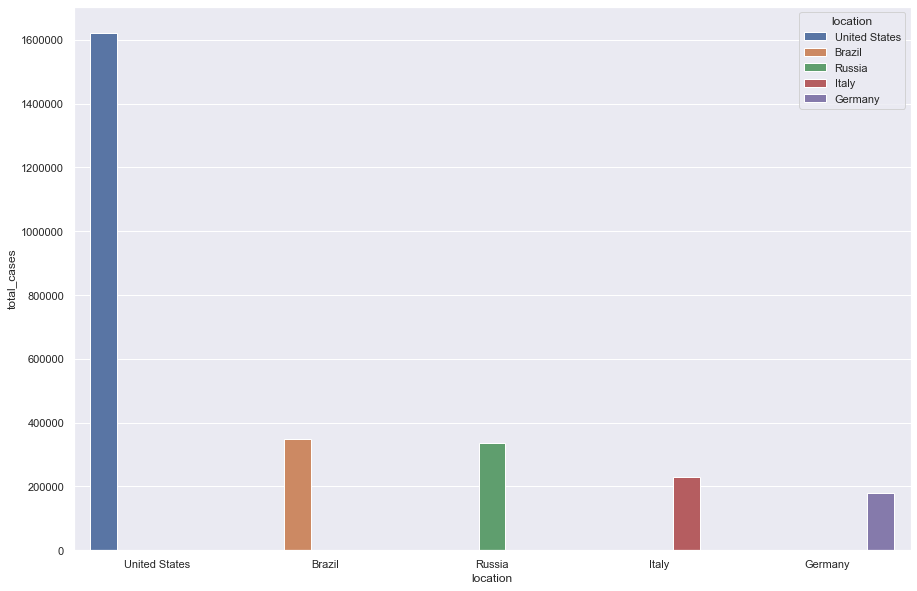

In [34]:
#Making bar-plot for countries with top cases
sns.barplot(x="location",y="total_cases",data=max_cases_country[1:6],hue="location")
plt.show()

In [58]:
india_case.head()

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,...,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_100k
8379,IND,India,2019-12-31,0,0,0,0,0.0,0.0,0.0,...,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53
8380,IND,India,2020-01-01,0,0,0,0,0.0,0.0,0.0,...,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53
8381,IND,India,2020-01-02,0,0,0,0,0.0,0.0,0.0,...,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53
8382,IND,India,2020-01-03,0,0,0,0,0.0,0.0,0.0,...,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53
8383,IND,India,2020-01-04,0,0,0,0,0.0,0.0,0.0,...,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53


# Linear regression


In [66]:
#converting string date to date-time
import datetime as dt
india_case['date'] = pd.to_datetime(india_case['date']) 
india_case.head()

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,...,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_100k
8379,IND,India,2019-12-31,0,0,0,0,0.0,0.0,0.0,...,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53
8380,IND,India,2020-01-01,0,0,0,0,0.0,0.0,0.0,...,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53
8381,IND,India,2020-01-02,0,0,0,0,0.0,0.0,0.0,...,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53
8382,IND,India,2020-01-03,0,0,0,0,0.0,0.0,0.0,...,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53
8383,IND,India,2020-01-04,0,0,0,0,0.0,0.0,0.0,...,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53


In [67]:
india_case.head()

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,...,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_100k
8379,IND,India,2019-12-31,0,0,0,0,0.0,0.0,0.0,...,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53
8380,IND,India,2020-01-01,0,0,0,0,0.0,0.0,0.0,...,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53
8381,IND,India,2020-01-02,0,0,0,0,0.0,0.0,0.0,...,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53
8382,IND,India,2020-01-03,0,0,0,0,0.0,0.0,0.0,...,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53
8383,IND,India,2020-01-04,0,0,0,0,0.0,0.0,0.0,...,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53


### converting date-time to ordinal

In [68]:
#converting date-time to ordinal
india_case['date']=india_case['date'].map(dt.datetime.toordinal)
india_case.head()

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,...,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_100k
8379,IND,India,737424,0,0,0,0,0.0,0.0,0.0,...,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53
8380,IND,India,737425,0,0,0,0,0.0,0.0,0.0,...,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53
8381,IND,India,737426,0,0,0,0,0.0,0.0,0.0,...,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53
8382,IND,India,737427,0,0,0,0,0.0,0.0,0.0,...,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53
8383,IND,India,737428,0,0,0,0,0.0,0.0,0.0,...,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53


In [69]:
#getting dependent variable and inpedent variable
x=india_case['date']
y=india_case['total_cases']

In [70]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [71]:
from sklearn.linear_model import LinearRegression

In [72]:
lr = LinearRegression()

In [73]:
import numpy as np
lr.fit(np.array(x_train).reshape(-1,1),np.array(y_train).reshape(-1,1))

LinearRegression()

In [74]:
india_case.tail()

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,...,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_100k
8519,IND,India,737565,106750,5611,3303,140,77.355,4.066,2.393,...,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53
8520,IND,India,737566,112359,5609,3435,132,81.419,4.064,2.489,...,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53
8521,IND,India,737567,118447,6088,3583,148,85.831,4.412,2.596,...,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53
8522,IND,India,737568,125101,6654,3720,137,90.653,4.822,2.696,...,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53
8523,IND,India,737569,131868,6767,3867,147,95.556,4.904,2.802,...,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53


In [75]:
y_pred=lr.predict(np.array(x_test).reshape(-1,1))

In [76]:
from sklearn.metrics import mean_squared_error

In [77]:
mean_squared_error(x_test,y_pred)

521133099265.49316

In [78]:
lr.predict(np.array([[737573]]))

array([[52118.81303227]])